In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income
0,Rob,27,7000
1,Michel,29,90000
2,Ramu,29,61000
3,David,28,60000
4,fhf,42,150000


In [ ]:
# plt.scatter(df)

In [ ]:
km = KMeans(n_clusters=3)
km

y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

df['cluster'] = y_pred
df.head()

,Name,Age,Income,cluster
0,Rob,27,7000,2
1,Michel,29,90000,0
2,Ramu,29,61000,0
3,David,28,60000,0
4,fhf,42,150000,1


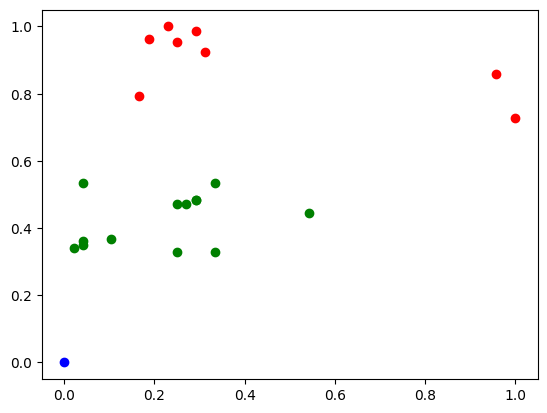

In [ ]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1.Income, color = 'green')
plt.scatter(df2.Age, df2.Income, color = 'red')
plt.scatter(df3.Age, df3.Income, color = 'blue')

# plt.xlabel = 'Age'
# plt.ylabel = 'Income'
# plt.plot()
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

plt.xlabel = 'Age'
plt.ylabel = 'Income'


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['Name','Income'],axis = 'columns')
y= df.Income

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test,km.predict(x_test))
cm